## EE-938 - Introduction to Reinforcement Learning - Coding Assignment-1
**Name:** Venkateswar Reddy Melachervu<br />
**Roll No:** 23156022

In [ ]:
# Required Libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import time

In [ ]:
# Parameters
num_experiments = 500
T = 10000
K = 2
delta = 1/4
delta_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45]

***
Consider a two-armed Bernoulli bandit scenario with true means given by $\mu(0) = \frac{1}{2}, \mu(1)= \frac{1}{2}+\Delta$, for some $\Delta < \frac{1}{2}$. In the Bernoulli bandit scenario the environment generates a binary reward (either 1 or 0) by flipping a coin with the true mean of the chosen arm as the bias.  

Let the time horizon be $T=10000$. `[20 Marks]`

### E1 - Compute Average Regret
We take $\Delta=\frac{1}{4}$ and run the Monte Carlo simulations to estimate the expected regret of the ETC algorithm which explores each arm $m = T^{2/3} (\log T)^{1/3}$ times before committing. Specifically, we run the ETC algorithm to compute the sample regret
$$ \mu(1) * T - \sum_{t=1}^T R_t = \sum_{t=1}^T[\mu(1) - R_t] $$
where $R_t$ is the reward obtained in time step $t$ and $\mu(1)$ is $\mu^*$.

Let us repeat this experiment 500 times and estimate the expected regret by taking the average of the sample regrets you obtained in all those 500 experiments.

In [ ]:
## E1: ETC total regret computation ##
mu0 = 1/2
mu1 = 1/2 + delta
# Initialize ETC exploration count
m = int(T**(2/3) * (np.log(T))**(1/3))

# Monte Carlo simulation for estimating the total regret
total_regrets = []
print("Running Monte Carlo simulation to estimate the total Regret...")
print("Number of experiments/trials:", num_experiments)
print("Number of episodes in each experiment:", T)
print("Number of explorations in each experiment:", K * m)
print("Number of exploitations:", (T - K*m))
print("Number of arms to explore:", K)

# Measure the time before running the algorithm
start_time = time.time()
for _ in range(num_experiments):
    # Generate true means based on given values and arms
    empirical_means = np.zeros(K)
    arm_counts = np.zeros(K)
    total_regret = 0

    # Run ETC algorithm
    for t in range(1, T + 1):
        # Code for choosing the arm here for the ETC algorithm
        # Explore each arm m times then -> Commit to the arm with the highest empirical mean
        # store the chosen arm in the variable chosen_arm
        # this will be 0 if Arm 0 is chosen and 1 if Arm 1 is chosen
        if t <= K * m:
            chosen_arm = (t - 1) % K
        else:
            chosen_arm = np.argmax(empirical_means)

        # Observe the reward from the environment for the chosen arm
        reward = np.random.binomial(1, mu0 if chosen_arm == 0 else mu1)

        # Update arm_counts and empirical_means for the chosen_arm
        arm_counts[chosen_arm] += 1
        empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

        # Update total regret based on reward recieved
        # update the variable total_regret
        total_regret += mu1  - reward

    # Record total regrets over all the experiments
    total_regrets.append(total_regret)

# Measure the time after running the algorithm
end_time = time.time()

# Calculate average regret
average_regret = np.mean(total_regrets)
print(f"Average ETC regret using Monte Carlo simulation: {average_regret}")

# Calculate the elapsed time
elapsed_time_etc = end_time - start_time
minutes, seconds_with_fraction = divmod(elapsed_time_etc, 60)
print("Elapsed time for the Monte Carlo simulation:", int(minutes), "minutes and ", seconds_with_fraction, "seconds")

Running Monte Carlo simulation to estimate the total Regret...
Number of experiments/trials: 500
Number of episodes in each experiment: 10000
Number of explorations in each experiment: 1944
Number of exploitations: 8056
Number of arms to explore: 2
Average ETC regret using Monte Carlo simulation: 243.586
Elapsed time for the Monte Carlo simulation: 0 minutes and  17.2146418094635 seconds


In [ ]:
## E2: ETC regret plot for different deltas ##

# Initialize lists to store results
average_regrets_etc = {}

# Initialize ETC algorithm parameters
m = int(T**(2/3) * (np.log(T))**(1/3))

print("Finding average regrets using ETC algorithm for each Delta...")
# Run ETC algorithm
# Measure the time before running the algorithm
start_time = time.time()
for delta in delta_values:
  total_regrets = []
  mu0 = 0.5
  mu1 = 0.5 + delta
  # Generate total regret for each delta based on true means based of the arms
  for _ in range(num_experiments):
    empirical_means = np.zeros(K)
    arm_counts = np.zeros(K)
    total_regret = 0
    # Run ETC algorithm
    for t in range(1, T + 1):
      # Explore each arm m times then commit to the arm with the highest empirical mean for the rest of the experiment
      # Chose the arm (0 or 1) to find the regret
      if t <= K * m:
        chosen_arm = (t - 1) % K
      else:
        # Commit to the arm with the highest empirical mean for the rest of the experiments
        chosen_arm = np.argmax(empirical_means)

      # Observe the reward from the environment for the chosen arm
      reward = np.random.binomial(1, mu0 if chosen_arm == 0 else mu1)

      # Update arm_counts
      arm_counts[chosen_arm] += 1

      # Compute moving average of empirical_means for the chosen_arm
      empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

      # Update total regret till this experiment
      #total_regret += max([mu0, mu1]) - reward
      total_regret += mu1 - reward

    # Record total regret till this experiment
    total_regrets.append(total_regret)

  # Calculate average regret for this delta
  delta_average_regret_etc = np.mean(total_regrets)
  average_regrets_etc[delta] = delta_average_regret_etc

# Measure the time after running the algorithm
end_time = time.time()

# print average regrets per delta
for delta, regret in average_regrets_etc.items():
  print("Average ETC regret, using Monte Carlo simulation, for delta:", delta, "is:", regret)

# Calculate the elapsed time
elapsed_time_etc = end_time - start_time
minutes, seconds_with_fraction = divmod(elapsed_time_etc, 60)
print("Elapsed time for ETC Monte Carlo simulation:", int(minutes), "minute(s) and ", seconds_with_fraction, "seconds")

Finding average regrets using ETC algorithm for each Delta...
Average ETC regret, using Monte Carlo simulation, for delta: 0.05 is: 51.7619999999868
Average ETC regret, using Monte Carlo simulation, for delta: 0.1 is: 95.62599999996237
Average ETC regret, using Monte Carlo simulation, for delta: 0.2 is: 192.78799999990716
Average ETC regret, using Monte Carlo simulation, for delta: 0.3 is: 291.98800000010226
Average ETC regret, using Monte Carlo simulation, for delta: 0.4 is: 386.43199999980686
Average ETC regret, using Monte Carlo simulation, for delta: 0.45 is: 437.77599999989417
Elapsed time for ETC Monte Carlo simulation: 1 minute(s) and  42.951767683029175 seconds


**ETC (Explore-Then-Commit) algorithm**  <br />
The ETC (Explore-Then-Commit) algorithm is a bandit algorithm that explores each arm a certain number of times before committing to the arm with the highest estimated mean. In this case, the exploration parameter is set as $𝑚 = 𝑇^{2/3} (\log 𝑇)^{1/3}$.<br />


### E2 - Plot Average/Estimated Regret - As a function of $\Delta$

Now we repeat the above for various values of $\Delta \in \{0.05, 0.1, 0.2, 0.3, 0.4, 0.45\}$ and plot the estimated regret as a function of $\Delta$.

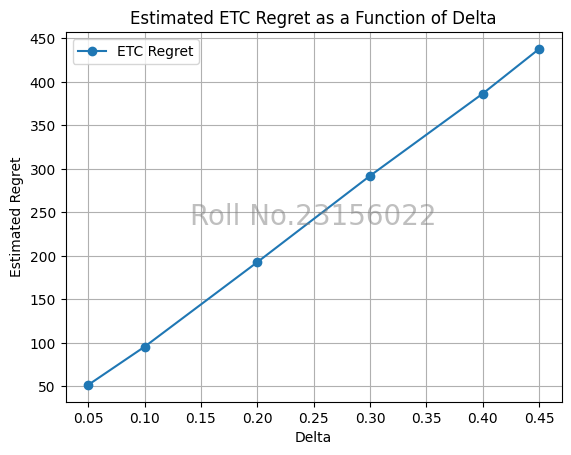

In [ ]:
## Plot for E2 Solution - The ETC algorithm ##
deltas = list(average_regrets_etc.keys())
average_regrets = list(average_regrets_etc.values())
plt.plot(deltas, average_regrets, marker='o',label = 'ETC Regret')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Estimated ETC Regret as a Function of Delta')
plt.legend()
plt.grid(True)
plt.text(0.5, 0.5, 'Roll No.23156022', color='gray', fontsize=20, alpha=0.5, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

***
# Questions

### Q1: The Upper Confidence Bound (UCB) algorithm
Repeat the experiment for various values of delta using the UCB algorithm and plot the comparison with ETC. `[10 Marks]`

**The Upper Confidence Bound (UCB) algorithm** is a popular algorithm used in multi-armed bandit problems. Its key idea is to balance exploration and exploitation by choosing arms based on both their empirical means and an exploration term. The exploration term is designed to account for uncertainty in the estimates of arm means. Here's how UCB works:

Assuming we have two arms with true means $\mu(0) = \frac{1}{2}$ and $\mu(1) = \frac{1}{2} + \Delta$, and a time horizon $T = 10000$, the UCB algorithm proceeds as follows:

**Initialization:**
- Initialize empirical means and counts for each arm.
- For each arm $a$, set the empirical mean $\bar{\mu}_0(a)$ to $0$ and the count $n_0(a)$ to $0$.

**For each time step $t$ from $1$ to $T$:**
- For each arm $a$, calculate the Upper Confidence Bound (UCB) for that arm:
  $$ UCB_t(a) = \bar{\mu}_{t-1}(a) + \sqrt{\frac{2\log(T)}{n_{t-1}(a)}} $$
  where:
  - $\mu_t(a)$ is the empirical mean of arm $a$ at time $t$.
  - $n_t(a)$ is the count of arm $a$ at time $t$.
- Choose the arm with the highest UCB: $ \text{chosen_arm} = \underset{a}{\text{arg max}} ~ UCB_t(a) $

- Observe the reward $R_t$ for the chosen arm.
- Update the empirical mean and count for the chosen arm:
$$ n_{t}(\text{chosen_arm}) = n_{t-1}(\text{chosen_arm}) + 1 $$
$$ \bar{\mu}_{t}(\text{chosen_arm}) = \frac{\bar{\mu}_{t-1}(\text{chosen_arm}) \cdot(n_{t}(\text{chosen_arm}) -1) + R_t}{n_{t}(\text{chosen_arm})} $$


**Repeat until $t = T$.**

In [ ]:
## Solution for Q1 - The Upper Confidence Bound (UCB) algorithm ##

# Initialize lists to store results
average_regrets_ucb = {}

# Initialize ETC algorithm parameters
m = int(T**(2/3) * (np.log(T))**(1/3))

# UCB constant
# c_ucb = np.sqrt(3/2)
print("Finding average regrets using UCB algorithm for each Delta...")
# Measure the time before running the algorithm
start_time = time.time()
for delta in delta_values:
  total_regrets_ucb = []
  mu0 = 0.5
  mu1 = 0.5 + delta
  for _ in range(num_experiments):
    # Initialize UCB algorithm parameters
    empirical_means = np.zeros(K)
    arm_counts = np.ones(K)
    ucb_values = np.zeros(K)
    total_regret_ucb = 0

    # Run UCB algorithm
    for t in range(1, T + 1):
      # Explore each arm at least once
      if t <= K :
        # Explore each arm once
        chosen_arm = (t - 1) % K
      # Run UCB after exploring each arm at least once
      else:
        # Calculate UCB for each arm
        chosen_arm = 0
        ucb_arm_0 = empirical_means[chosen_arm] + np.sqrt(2*np.log(T)/arm_counts[chosen_arm])
        chosen_arm = 1
        ucb_values[chosen_arm] = ucb_arm_0
        ucb_arm_1 = empirical_means[chosen_arm] + np.sqrt(2*np.log(T)/arm_counts[chosen_arm])
        ucb_values[chosen_arm] = ucb_arm_1

        # Choose the arm with the highest UCB calculated above
        chosen_arm = np.argmax(ucb_values)

      # Observe the reward from the environment for the chosen arm
      reward = np.random.binomial(1, mu0 if chosen_arm == 0 else mu1)
      # Update arm_counts and empirical_means for the chosen_arm
      arm_counts[chosen_arm] += 1
      empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]
      # Update total regret based on reward recieved
      total_regret_ucb += mu1  - reward

    # Record total regret for this experiment
    total_regrets_ucb.append(total_regret_ucb)

  # Calculate average regret for this delta
  delta_average_regret_ucb = np.mean(total_regrets_ucb)
  average_regrets_ucb[delta] = delta_average_regret_ucb

# Measure the time after running the algorithm
end_time = time.time()

# print average regrets per delta
for delta, regret in average_regrets_ucb.items():
  print("Average UCB regret, using Monte Carlo simulation, for delta:", delta, "is:", regret)

# Calculate the elapsed time
elapsed_time_ucb = end_time - start_time
minutes, seconds_with_fraction = divmod(elapsed_time_ucb, 60)
print("Elapsed time for the UCB Monte Carlo simulation:", int(minutes), "minute(s) and ", seconds_with_fraction, "seconds")

Finding average regrets using UCB algorithm for each Delta...
Average UCB regret, using Monte Carlo simulation, for delta: 0.05 is: 2.2559999999945983
Average UCB regret, using Monte Carlo simulation, for delta: 0.1 is: -4.20199999999812
Average UCB regret, using Monte Carlo simulation, for delta: 0.2 is: 1.4080000000045825
Average UCB regret, using Monte Carlo simulation, for delta: 0.3 is: -1.2600000000028753
Average UCB regret, using Monte Carlo simulation, for delta: 0.4 is: -0.6460000000035266
Average UCB regret, using Monte Carlo simulation, for delta: 0.45 is: -0.016000000001505157
Elapsed time for the UCB Monte Carlo simulation: 5 minute(s) and  39.130042552948 seconds


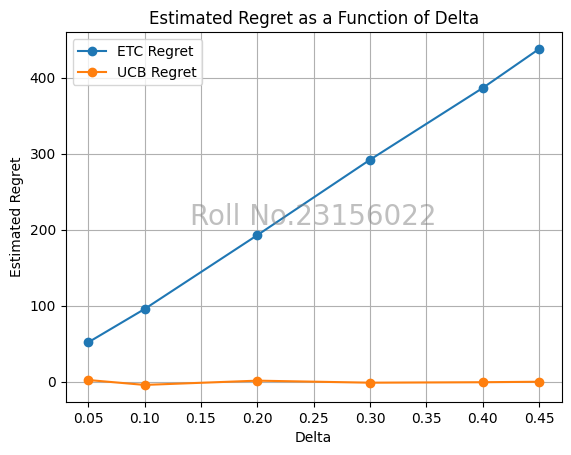

In [ ]:
## Plot for Q1 Solution - The Upper Confidence Bound (UCB) algorithm ##
# Comparison of ETC and UCB algorithms through plots
deltas_key_list_etc = list(average_regrets_etc.keys())
deltas_key_list_ucb = list(average_regrets_ucb.keys())
average_regrets_etc_values_list = list(average_regrets_etc.values())
average_regrets_ucb_values_list = list(average_regrets_ucb.values())

plt.plot(deltas_key_list_etc, average_regrets_etc_values_list, marker='o',label = 'ETC Regret')
plt.plot(deltas_key_list_ucb, average_regrets_ucb_values_list, marker='o',label = 'UCB Regret')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Estimated Regret as a Function of Delta')
plt.legend()
plt.grid(True)
plt.text(0.5, 0.5, 'Roll No.23156022', color='gray', fontsize=20, alpha=0.5, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

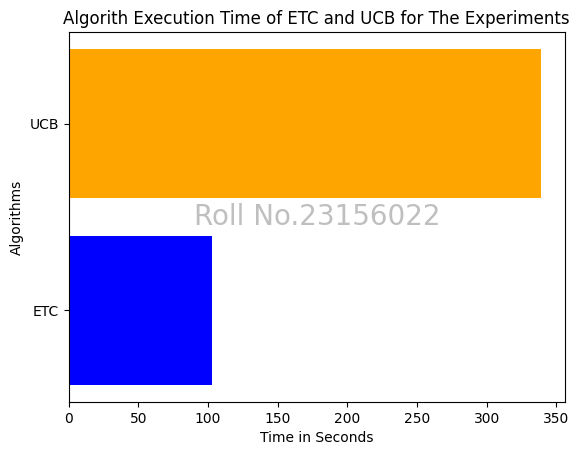

In [ ]:
# Plot for Q1 Solutin - Algorith Execution Times by ETC and UCB for the expertiments
values = [elapsed_time_etc, elapsed_time_ucb]
labels = ['ETC', 'UCB']

# Set the positions of the bars on the y-axis
y = range(len(labels))

# Plotting the horizontal bars
plt.barh(y, values, color=['blue', 'orange'])

# Adding labels, title, and legend
plt.xlabel('Time in Seconds')
plt.ylabel('Algorithms')
plt.title('Algorith Execution Time of ETC and UCB for The Experiments')
plt.yticks(y, labels)
plt.text(0.5, 0.5, 'Roll No.23156022', color='gray', fontsize=20, alpha=0.5, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

### (**Bonus**) Q2: The $\epsilon$-greedy algorithm
Repeat the above experiment for various values of $\Delta$ using the $\epsilon$-greedy algorithm and plot the comparison with ETC and UCB. `[5 Marks]`

**The $\epsilon$-greedy algorithm** is a popular algorithm used in multi-armed bandit problems. Its key idea is to balance exploration and exploitation by choosing arms based on both their empirical means and mixing it up sometimes with exploration. The exploration probabiliy $\epsilon$ designed to account for the fact that true means are not known and some exploration will help us find a better estimate of that. Here's how $\epsilon$-greedy works:

Assuming we have two arms with true means $\mu(0) = \frac{1}{2}$ and $\mu(1) = \frac{1}{2} + \Delta$, and a time horizon $T = 10000$, the $\epsilon$-greedy algorithm proceeds as follows:

**Initialization:**
- Initialize empirical means and counts for each arm.
- For each arm $a$, set the empirical mean $\bar{\mu}_0(a)$ to $0$ and the count $n_0(a)$ to $0$.

**For each time step $t$ from $1$ to $T$:**
- Toss a coin with probability of heads as $1-\epsilon$
- If we get "Heads" ($ϵ$):
    - Choose the arm with the highest empirical mean: $ \text{chosen\_arm} = \underset{a}{\text{arg max}} \bar{\mu}_t(a) $
- else - if we get "Tails" ($1-ϵ$):
    - Choose an arm at random
- Observe the reward $R_t$ for the chosen arm
- Update the empirical mean and count for the chosen arm:
$$ n_{t}(\text{chosen_arm}) = n_{t-1}(\text{chosen_arm}) + 1 $$
$$ \bar{\mu}_{t}(\text{chosen_arm}) = \frac{\bar{\mu}_{t-1}(\text{chosen_arm}) \cdot(n_{t}(\text{chosen_arm}) -1) + R_t}{n_{t}(\text{chosen_arm})} $$


The constant $\epsilon$ in the $\epsilon$-greedy algorithm controls the trade-off between exploration and exploitation. A common choice is $\epsilon = 0.1$.

In [ ]:
## Solution for Bonus Q2 - The ϵ-greedy algorithm ##
# Initialize lists to store results
average_regrets_egreedy = {}

# Initialize ETC algorithm parameters
m = int(T**(2/3) * (np.log(T))**(1/3))

# Define epsilon - e - for ϵ-greedy
epsilon = (K/T)**(1/3)
heads = (1-epsilon)
print("Finding average regrets using e-greedy algorithm for each Delta...")
# Find the current time before running the algorithm
start_time = time.time()
for delta in delta_values:
  total_regrets_egreedy = []
  mu0 = 0.5
  mu1 = 0.5 + delta
  for _ in range(num_experiments):
    # Initialize e-greedy algorithm parameters
    empirical_means = np.zeros(K)
    arm_counts = np.zeros(K)
    total_regret_egreedy = 0
    # Run e-greedy algorithm after exploring each arm once
    for t in range(1, T + 1):
      if t <= K :
        # Explore each arm once
        chosen_arm = (t - 1) % K
        # Observe the reward from the environment for the chosen arm
        reward = np.random.binomial(1, mu0 if chosen_arm == 0 else mu1)
      else:
        # Toss a coin with bias epsilon
        coin_landing = np.random.binomial(n=1, p=epsilon)
        # Coin lands in tail (epsilon)
        if coin_landing <= epsilon:
          # Choose an arm at random
          chosen_arm = random.randint(0,1)
        # Coin lands in heads (1-epsilon)
        else:
            # Choose the arm with the highest empirical mean - chosen_arm=arg maxaμ¯t(a)
          chosen_arm = np.argmax(empirical_means)

      # Observe the reward for the chosen arm
      reward = np.random.binomial(1, mu0 if chosen_arm == 0 else mu1)

      # Update arm_counts and empirical_means for the chosen_arm
      arm_counts[chosen_arm] += 1
      empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

      # Update total regret based on reward recieved
      total_regret_egreedy += mu1  - reward
      # Record total regret for this experiment
    total_regrets_egreedy.append(total_regret_egreedy)

  # Calculate average regret for this delta
  delta_average_regret_egreedy = np.mean(total_regrets_egreedy)
  average_regrets_egreedy[delta] = delta_average_regret_egreedy

# Measure the time after running the algorithm
end_time = time.time()

# print average regrets per delta
for delta, regret in average_regrets_egreedy.items():
  print("Average e-Greedy regret, using Monte Carlo simulation, for delta:", delta, "is:", regret)

# Calculate the elapsed time
elapsed_time_egreedy = end_time - start_time
minutes, seconds_with_fraction = divmod(elapsed_time_egreedy, 60)
print("Elapsed time for the e-Greedy Monte Carlo simulation:", int(minutes), "minute(s) and ", seconds_with_fraction, "seconds")

Finding average regrets using e-greedy algorithm for each Delta...
Average e-Greedy regret, using Monte Carlo simulation, for delta: 0.05 is: 237.47400000003887
Average e-Greedy regret, using Monte Carlo simulation, for delta: 0.1 is: 470.7200000000805
Average e-Greedy regret, using Monte Carlo simulation, for delta: 0.2 is: 940.2840000001632
Average e-Greedy regret, using Monte Carlo simulation, for delta: 0.3 is: 1412.8919999997397
Average e-Greedy regret, using Monte Carlo simulation, for delta: 0.4 is: 1884.024000000327
Average e-Greedy regret, using Monte Carlo simulation, for delta: 0.45 is: 2118.9360000002475
Elapsed time for the e-Greedy Monte Carlo simulation: 2 minute(s) and  0.7780182361602783 seconds


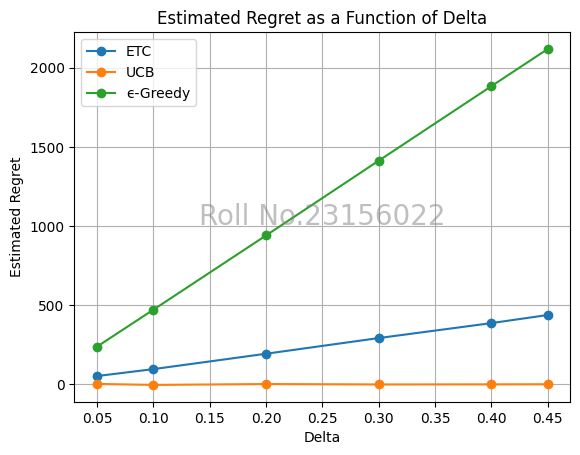

In [ ]:
## Solution for Bonus Q2 - The ϵ-greedy algorithm ##
# Comparison of ETC, UCB, and ϵ-greedy algorithms through plots
deltas_key_list_etc = list(average_regrets_etc.keys())
deltas_key_list_ucb = list(average_regrets_ucb.keys())
deltas_key_list_egreedy = list(average_regrets_egreedy.keys())
average_regrets_etc_values_list = list(average_regrets_etc.values())
average_regrets_ucb_values_list = list(average_regrets_ucb.values())
average_regrets_egreedy_values_list = list(average_regrets_egreedy.values())

plt.plot(deltas_key_list_etc, average_regrets_etc_values_list, marker='o',label = 'ETC')
plt.plot(deltas_key_list_ucb, average_regrets_ucb_values_list, marker='o',label = 'UCB')
plt.plot(deltas_key_list_egreedy, average_regrets_egreedy_values_list, marker='o',label = 'ϵ-Greedy')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Estimated Regret as a Function of Delta')
plt.legend()
plt.grid(True)
plt.text(0.5, 0.5, 'Roll No.23156022', color='gray', fontsize=20, alpha=0.5, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

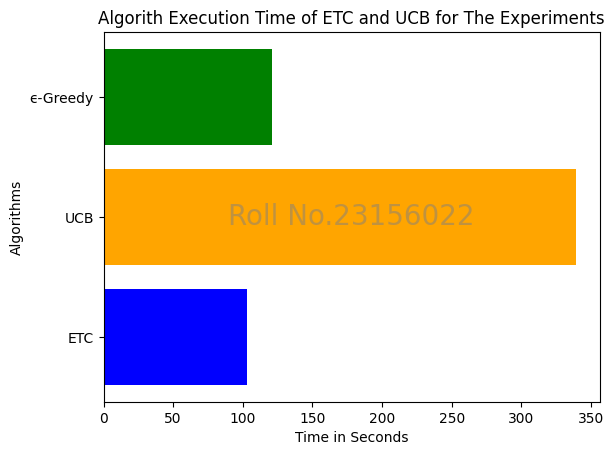

In [ ]:
# Plot for Bonus Q2 Solutin - Algorith Execution Times by ETC, UCB, and  ϵ-greedy for the expertiments
values = [elapsed_time_etc, elapsed_time_ucb, elapsed_time_egreedy]
labels = ['ETC', 'UCB', 'ϵ-Greedy']

# Set the positions of the bars on the y-axis
y = range(len(labels))

# Plotting the horizontal bars
plt.barh(y, values, color=['blue', 'orange', 'green'])

# Adding labels, title, and legend
plt.xlabel('Time in Seconds')
plt.ylabel('Algorithms')
plt.title('Algorith Execution Time of ETC and UCB for The Experiments')
plt.yticks(y, labels)
plt.text(0.5, 0.5, 'Roll No.23156022', color='gray', fontsize=20, alpha=0.5, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

**Conclusion, what do you observe?:** <br />
*   The cumulative regret is very high for ϵ-greedy, followed by moderately high for UCB and pretty much 0 for UCB.
*   Understandably, the computational time for UCB is high which is a price to pay for better reward outcomes and lesser or zero regret
*   When the $\Delta$ is smaller the variance across the cumulative regret computed by across all 3 algorithms - ETC, UCB, ϵ-greedy is a smaller number (~180)
*   As the $\Delta$ increases this variance shoots up to ~2100+
*   However, the higher computational time of ϵ-greedy comparative to ETC is not justified in terms of the total regret - higher cumulative regret than ETC took lesser computing time.




